In [1]:
from importlib.resources import path
import pandas as pd
import matplotlib.pyplot as plt
import STRINGdb

STRINGdb.init(12.0)

In [2]:
markers = pd.read_csv(path(STRINGdb.dataset,'genes.csv'), index_col=0)
# some mouse genes
markers = markers[markers['avg_logFC'].abs()>=1.5]
# will download data file when first run .map_id_local()
ids = STRINGdb.Meta(10090, idents=markers.index).map_id_local()
stringids =  markers.join(ids, how='right')
stringids

Conversion rate is: 1.0 !


,p_val,avg_logFC,pct.1,pct.2,p_val_adj,pct_FC,#string_protein_id
alias,,,,,,,
Alox5ap,5.947131e-89,-1.560391,0.260,0.472,1.579320e-84,0.550847,10090.ENSMUSP00000071130
Anxa1,2.142611e-70,-1.798337,0.162,0.362,5.689919e-66,0.447514,10090.ENSMUSP00000025561
Camp,2.855950e-28,-2.245043,0.354,0.471,7.584262e-24,0.751592,10090.ENSMUSP00000098843
Chil3,4.231892e-43,-2.121139,0.378,0.519,1.123821e-38,0.728324,10090.ENSMUSP00000053923
Cr2,0.000000e+00,1.575142,0.820,0.323,0.000000e+00,2.538700,10090.ENSMUSP00000080938
Fcer1g,1.122473e-126,-1.853199,0.259,0.522,2.980840e-122,0.496169,10090.ENSMUSP00000078875
Hba-a1,3.574351e-07,-1.755140,0.198,0.262,9.492047e-03,0.755725,10090.ENSMUSP00000090895
Hbb-bs,6.587229e-03,-1.762097,0.321,0.365,1.000000e+00,0.879452,10090.ENSMUSP00000023934
Ifitm6,1.100395e-59,-1.770722,0.334,0.506,2.922209e-55,0.660079,10090.ENSMUSP00000147357


In [3]:
idents = STRINGdb.Identifier(10090, idents=ids.values, sig=stringids[['p_val','avg_logFC']])

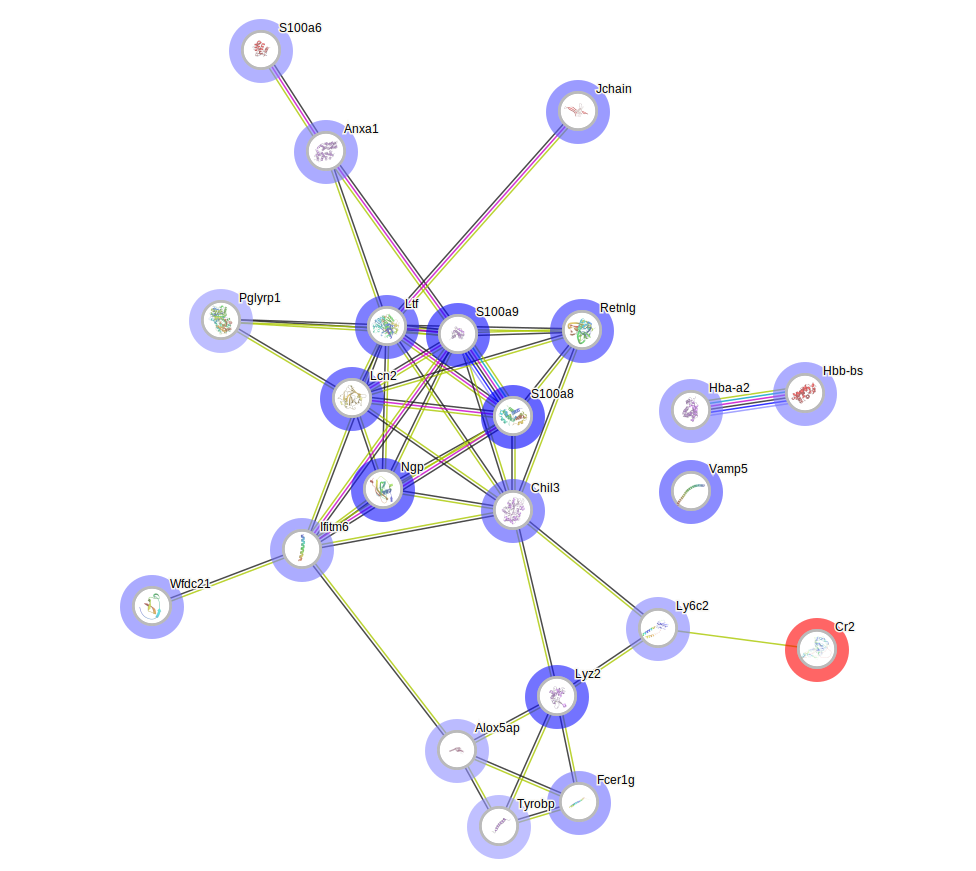

In [4]:
image = STRINGdb.Image(idents)
image.plot('png', save='demo.png')
image.add_holo(logFoldChange='avg_logFC')
image.plot('svg', save='demo.svg')
from IPython import display
display.display(display.SVG('demo.svg'))

In [4]:
STRINGdb.Enrichment(idents).functional_annotation()

,category,term,number_of_genes,ratio_in_set,ncbiTaxonId,inputGenes,preferredNames,description
0,COMPARTMENTS,GOCC:0000137,1,0.045,10090,10090.ENSMUSP00000089801,Lyz2,Golgi cis cisterna
1,COMPARTMENTS,GOCC:0000323,2,0.091,10090,"10090.ENSMUSP00000025561,10090.ENSMUSP00000064385","Anxa1,S100a8",Lytic vacuole
2,COMPARTMENTS,GOCC:0001533,2,0.091,10090,"10090.ENSMUSP00000025561,10090.ENSMUSP00000112843","Anxa1,S100a9",Cornified envelope
3,COMPARTMENTS,GOCC:0005576,13,0.591,10090,"10090.ENSMUSP00000025561,10090.ENSMUSP00000032...","Anxa1,Pglyrp1,Ngp,Ltf,Chil3,Lcn2,S100a8,Wfdc21...",Extracellular region
4,COMPARTMENTS,GOCC:0005615,12,0.545,10090,"10090.ENSMUSP00000025561,10090.ENSMUSP00000035...","Anxa1,Ngp,Ltf,Chil3,Lcn2,S100a8,Wfdc21,Retnlg,...",Extracellular space
...,...,...,...,...,...,...,...,...
2744,NetworkNeighborAL,CL:570,1,0.045,10090,10090.ENSMUSP00000080938,Cr2,"Mixed, incl. Negative regulation of inflammato..."
2745,NetworkNeighborAL,CL:585,1,0.045,10090,10090.ENSMUSP00000080938,Cr2,"Macrophage fusion, and Interferon-induced tran..."
2746,NetworkNeighborAL,CL:7815,2,0.091,10090,"10090.ENSMUSP00000023934,10090.ENSMUSP00000090895","Hbb-bs,Hba-a2","Mixed, incl. Hemoglobin complex, and Actin fil..."
2747,NetworkNeighborAL,CL:7891,2,0.091,10090,"10090.ENSMUSP00000023934,10090.ENSMUSP00000090895","Hbb-bs,Hba-a2",Hemoglobin complex


In [5]:
STRINGdb.Enrichment(idents).ppi()

{'number_of_nodes': 22,
 'number_of_edges': 45,
 'average_node_degree': 4.09,
 'local_clustering_coefficient': 0.735,
 'expected_number_of_edges': 2,
 'p_value': 0.0}

Plot STRING network using igraph

In [6]:
plt.rcParams['font.sans-serif'] = ['Helvetica', 'Noto Sans', 'Devaju Sans']

interactions = STRINGdb.Graph(idents)
df = interactions.subnetwork(thres=400, label=ids)

In [7]:
df

,score,source,target
0,520,10090.ENSMUSP00000025561,10090.ENSMUSP00000035077
1,838,10090.ENSMUSP00000025561,10090.ENSMUSP00000001051
2,432,10090.ENSMUSP00000025561,10090.ENSMUSP00000112843
3,433,10090.ENSMUSP00000084259,10090.ENSMUSP00000035077
4,998,10090.ENSMUSP00000023934,10090.ENSMUSP00000090895
...,...,...,...
85,432,10090.ENSMUSP00000032573,10090.ENSMUSP00000112843
86,626,10090.ENSMUSP00000098110,10090.ENSMUSP00000053923
87,657,10090.ENSMUSP00000098110,10090.ENSMUSP00000089801
88,410,10090.ENSMUSP00000098110,10090.ENSMUSP00000080938


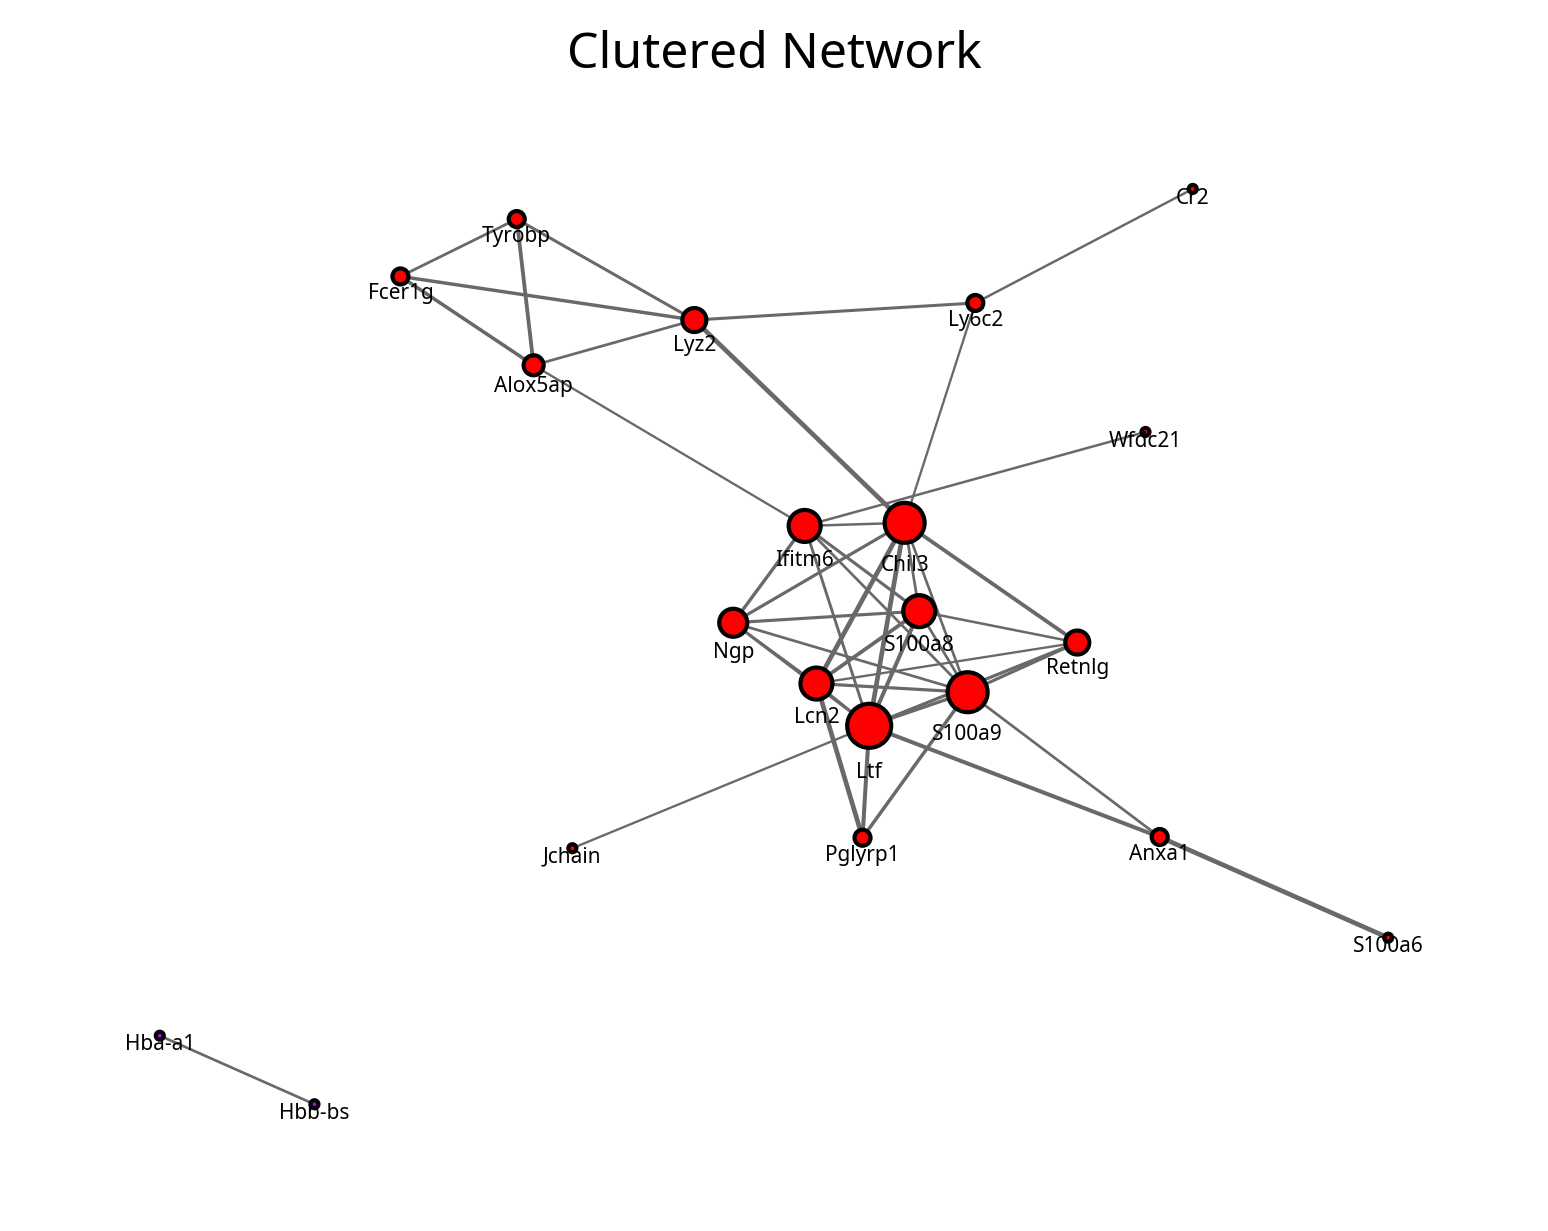

In [9]:
fig = interactions.plot(layout='auto')

In [11]:
df2 = interactions.remove_homologous_interactions()
df2

4 interaction(s) removed


,score,source,target
0,520,10090.ENSMUSP00000025561,10090.ENSMUSP00000035077
1,838,10090.ENSMUSP00000025561,10090.ENSMUSP00000001051
2,432,10090.ENSMUSP00000025561,10090.ENSMUSP00000112843
3,433,10090.ENSMUSP00000084259,10090.ENSMUSP00000035077
6,994,10090.ENSMUSP00000053962,10090.ENSMUSP00000035077
...,...,...,...
85,432,10090.ENSMUSP00000032573,10090.ENSMUSP00000112843
86,626,10090.ENSMUSP00000098110,10090.ENSMUSP00000053923
87,657,10090.ENSMUSP00000098110,10090.ENSMUSP00000089801
88,410,10090.ENSMUSP00000098110,10090.ENSMUSP00000080938


In [13]:
Homologous = interactions.homologous_interactions()
Homologous

,bitscore,score,source,target
0,61.2,999,10090.ENSMUSP00000064385,10090.ENSMUSP00000112843
1,109.0,998,10090.ENSMUSP00000023934,10090.ENSMUSP00000090895
2,61.2,999,10090.ENSMUSP00000112843,10090.ENSMUSP00000064385
3,109.0,998,10090.ENSMUSP00000090895,10090.ENSMUSP00000023934
